In [1]:
### Import the required libraries

import numpy as np
import pandas as pd

import yfinance as yf
import datetime
import matplotlib.pyplot as plt

## To use statsmodels for linear regression
import statsmodels.formula.api as smf

## To use sklearn for linear regression
from sklearn.linear_model import LinearRegression

In [2]:
# Imports

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import json
import requests
import yfinance as yf

# import urllib3
# urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# # Alpha Vantage API key
# api_key = ...

In [3]:
### Import the required libraries

import numpy as np
import pandas as pd

import yfinance as yf
import datetime
import matplotlib.pyplot as plt

## To use statsmodels for linear regression
import statsmodels.formula.api as smf

## To use sklearn for linear regression
from sklearn.linear_model import LinearRegression


In [4]:


end1 = datetime.date(2024, 1, 31)
start1 = end1 - pd.Timedelta(days = 365 * 10)



In [5]:
# ..222222..................
gold_df = yf.download("GC=F", start = start1, end = end1, progress = False)
crudeoil_df = yf.download("CL=F", start = start1, end = end1, progress = False)
gasoline_df = yf.download("RB=F", start = start1, end = end1, progress = False)
naturalgas_df = yf.download("NG=F", start = start1, end = end1, progress = False)
# uranium_df = yf.download("UX=F", start = start1, end = end1, progress = False)
snp500_df=yf.download("^SPX", start = start1, end = end1, progress = False)
silver_df=yf.download("SI=F", start = start1, end = end1, progress = False)
# copper_df=yf.download("HG", start = start1, end = end1, progress = False)
# cotton_df=yf.download("CT", start = start1, end = end1, progress = False)


gold_df['GC'] = np.log(gold_df['Adj Close'] / gold_df['Adj Close'].shift(1))
crudeoil_df['CL'] = np.log(crudeoil_df['Adj Close'] / crudeoil_df['Adj Close'].shift(1))
gasoline_df['RB'] = np.log(gasoline_df['Adj Close'] / gasoline_df['Adj Close'].shift(1))
naturalgas_df['NG'] = np.log(naturalgas_df['Adj Close'] / naturalgas_df['Adj Close'].shift(1))
# uranium_df['UX'] = np.log(uranium_df['Adj Close'] /uranium_df['Adj Close'].shift(1))
snp500_df['SPX'] = np.log(snp500_df['Adj Close'] /snp500_df['Adj Close'].shift(1))
silver_df['SI'] = np.log(silver_df['Adj Close'] /silver_df['Adj Close'].shift(1))
# copper_df['HG'] = np.log(copper_df['Adj Close'] /copper_df['Adj Close'].shift(1))
# cotton_df['CT'] = np.log(cotton_df['Adj Close'] /cotton_df['Adj Close'].shift(1))


C:\Users\91998\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
snp500_df

,Open,High,Low,Close,Adj Close,Volume,SPX
Date,,,,,,,
2014-02-03,1782.680054,1784.829956,1739.660034,1741.890015,1741.890015,4726040000,NaN
2014-02-04,1743.819946,1758.729980,1743.819946,1755.199951,1755.199951,4068410000,0.007612
2014-02-05,1753.380005,1755.790039,1737.920044,1751.640015,1751.640015,3984290000,-0.002030
2014-02-06,1752.989990,1774.060059,1752.989990,1773.430054,1773.430054,3825410000,0.012363
2014-02-07,1776.010010,1798.030029,1776.010010,1797.020020,1797.020020,3775990000,0.013214
...,...,...,...,...,...,...,...
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000,0.000812
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000,0.005247
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000,-0.000652


<Axes: xlabel='Date'>

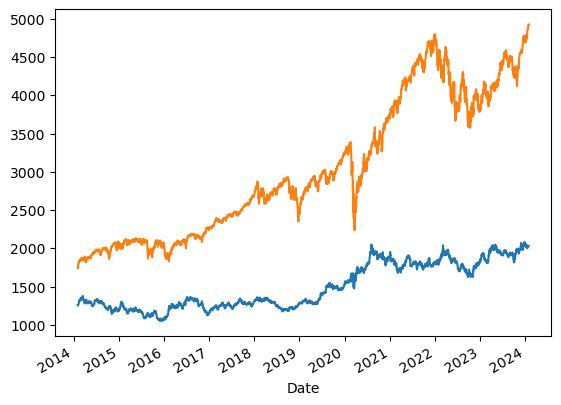

In [7]:
gold_df['Close'].plot()
# crudeoil_df['CL'].plot()
# gasoline_df['RB'].plot()
# naturalgas_df['NG'].plot()
snp500_df['Close'].plot()
# gold_df['Close'].plot()
# silver_df['Close'].plot()
# copper_df['Close'].plot()
# cotton_df['Close'].plot()


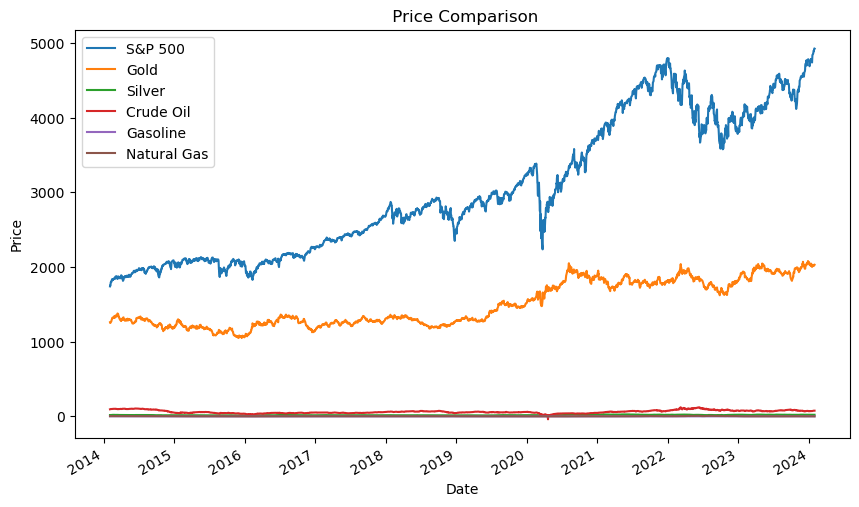

In [8]:
import matplotlib.pyplot as plt

# Plotting the closing prices
plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting S&P 500 closing prices
snp500_df['Close'].plot(label='S&P 500')

# Plotting gold closing prices
gold_df['Close'].plot(label='Gold')
silver_df['Close'].plot(label='Silver')

# Plotting copper closing prices
crudeoil_df['Close'].plot(label='Crude Oil')

gasoline_df['Close'].plot(label="Gasoline")

naturalgas_df['Close'].plot(label="Natural Gas")


# Adding legend
plt.legend()

# Adding chart title
plt.title(' Price Comparison')

# Adding axis labels
plt.xlabel('Date')
plt.ylabel('Price')

# Show plot
plt.show()

In [9]:
# Concatenate the closing prices of all stocks into a single DataFrame
closing_prices = pd.concat([snp500_df['Close'], gold_df['Close'], silver_df['Close'], crudeoil_df['Close'], gasoline_df['Close'], naturalgas_df['Close']], axis=1)
closing_prices.columns = ['S&P 500', 'Gold', 'Silver', 'Crude Oil', 'Gasoline', 'Natural Gas']

# Calculate the five-number summary
five_num_summary = closing_prices.describe().loc[['min', '25%', '50%', '75%', 'max']]

# Print the five-number summary
print("Five-Number Summary:")
print(five_num_summary)


Five-Number Summary:
         S&P 500         Gold     Silver   Crude Oil  Gasoline  Natural Gas
min  1741.890015  1050.800049  11.735000  -37.630001  0.411800      1.48200
25%  2138.140015  1248.000000  16.215750   48.520000  1.520800      2.54525
50%  2809.919922  1332.800049  17.772500   59.660000  1.882350      2.85400
75%  3929.470093  1799.400024  22.676000   75.942499  2.308275      3.65625
max  4927.930176  2081.899902  29.398001  123.699997  4.276200      9.68000


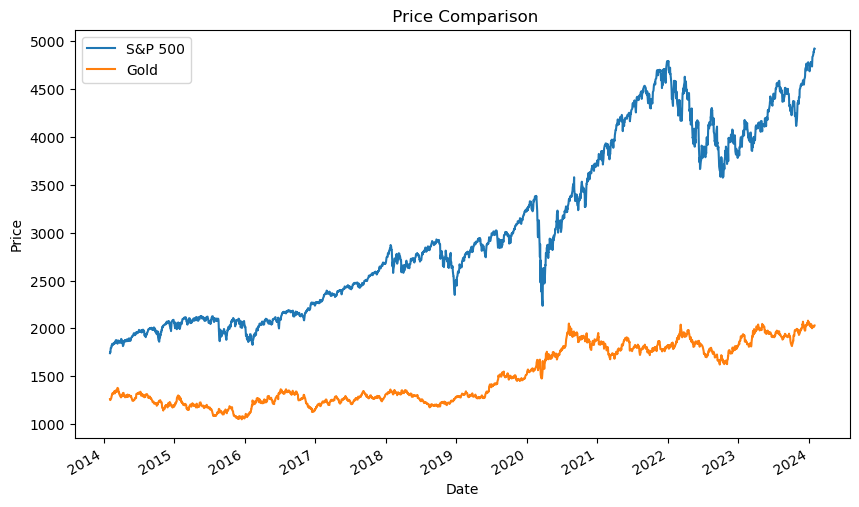

In [10]:
import matplotlib.pyplot as plt

# Plotting the closing prices
plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting S&P 500 closing prices
snp500_df['Close'].plot(label='S&P 500')

# Plotting gold closing prices
gold_df['Close'].plot(label='Gold')


# Adding legend
plt.legend()

# Adding chart title
plt.title(' Price Comparison')

# Adding axis labels
plt.xlabel('Date')
plt.ylabel('Price')

# Show plot
plt.show()


In [11]:
# Concatenate the closing prices of all stocks into a single DataFrame
closing_prices = pd.concat([snp500_df['Close'], gold_df['Close'], silver_df['Close'], crudeoil_df['Close'], gasoline_df['Close'], naturalgas_df['Close']], axis=1)
closing_prices.columns = ['S&P 500', 'Gold', 'Silver', 'Crude Oil', 'Gasoline', 'Natural Gas']

# Calculate the correlation matrix
correlation_matrix = closing_prices.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              S&P 500      Gold    Silver  Crude Oil  Gasoline  Natural Gas
S&P 500      1.000000  0.905760  0.743671   0.381841  0.417642     0.294176
Gold         0.905760  1.000000  0.849675   0.318318  0.351067     0.210280
Silver       0.743671  0.849675  1.000000   0.401098  0.406811     0.236944
Crude Oil    0.381841  0.318318  0.401098   1.000000  0.957165     0.696950
Gasoline     0.417642  0.351067  0.406811   0.957165  1.000000     0.685251
Natural Gas  0.294176  0.210280  0.236944   0.696950  0.685251     1.000000


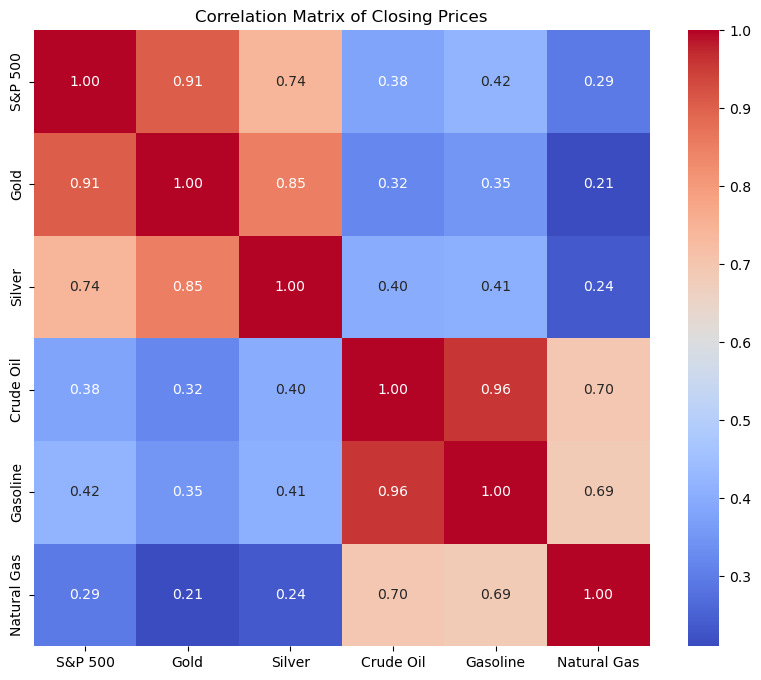

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = closing_prices.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title and display the plot
plt.title('Correlation Matrix of Closing Prices')
plt.show()


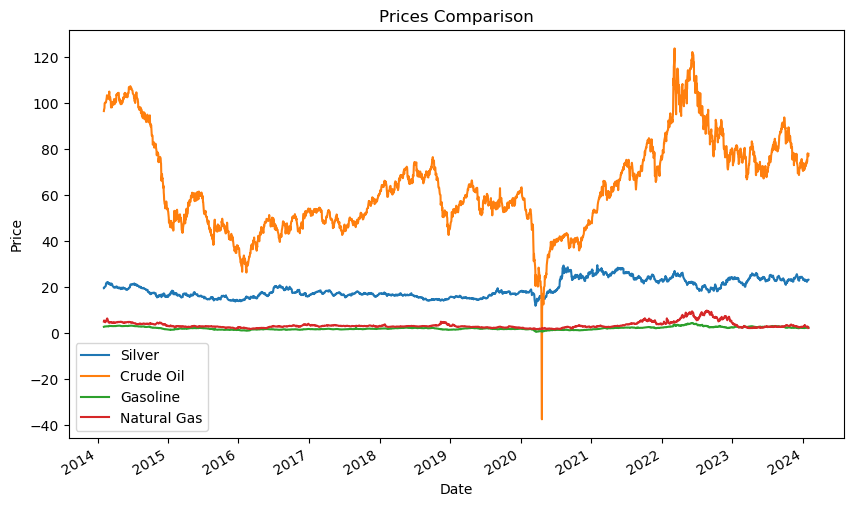

In [13]:
plt.figure(figsize=(10, 6))
# Plotting silver closing prices
silver_df['Close'].plot(label='Silver')

# Plotting copper closing prices
crudeoil_df['Close'].plot(label='Crude Oil')

gasoline_df['Close'].plot(label="Gasoline")

naturalgas_df['Close'].plot(label="Natural Gas")
# Adding legend
plt.legend()

# Adding chart title
plt.title('Prices Comparison')

# Adding axis labels
plt.xlabel('Date')
plt.ylabel('Price')

# Show plot
plt.show()

<Axes: xlabel='Date'>

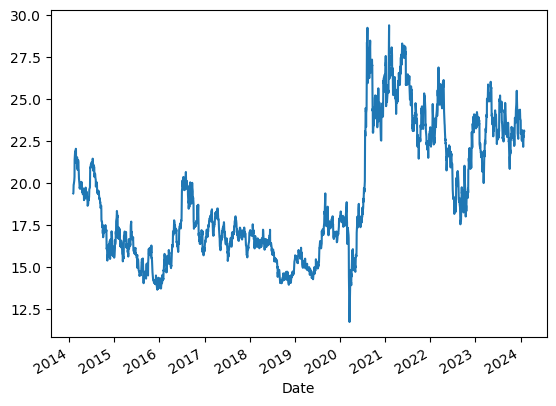

In [14]:

silver_df['Close'].plot()

<Axes: xlabel='Date'>

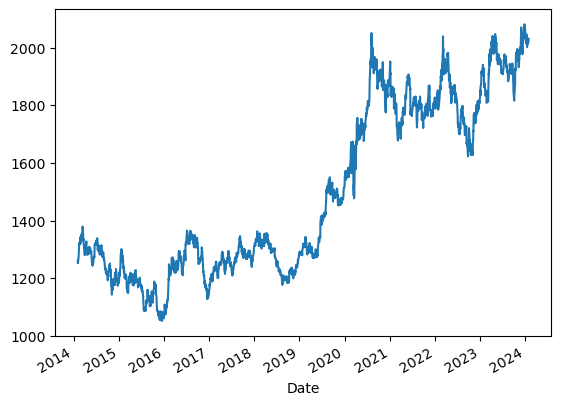

In [15]:
gold_df['Close'].plot()

In [16]:
# ................1

# ####################################################
# ## A scatter plot of X (spy) and Y (ko) to examine the nature of their relationship visually

# plt.figure(figsize = (10, 6))
# plt.rcParams.update({'font.size': 14})
# plt.xlabel("SPY returns")
# plt.ylabel("KO returns")
# plt.title("Scatter plot of daily returns (Jul 2018 to Jul 2021)")
# plt.scatter(df['spy'], df['ko'])
# plt.show()

In [17]:
# ....2.222222222222222222222


dataFrame = pd.concat([gold_df['GC'], crudeoil_df['CL'], snp500_df['SPX'],
               gasoline_df['RB'],naturalgas_df['NG']], axis = 1).dropna()

## Save the csv file. Good practice to save data files after initial processing
dataFrame.to_csv("Jan 2024_data_lin_regression.csv")

In [18]:
# print(gold_df['GC'])
# print(crudeoil_df['CL'])
# print( gasoline_df['RB'])
# print(naturalgas_df['NG'])


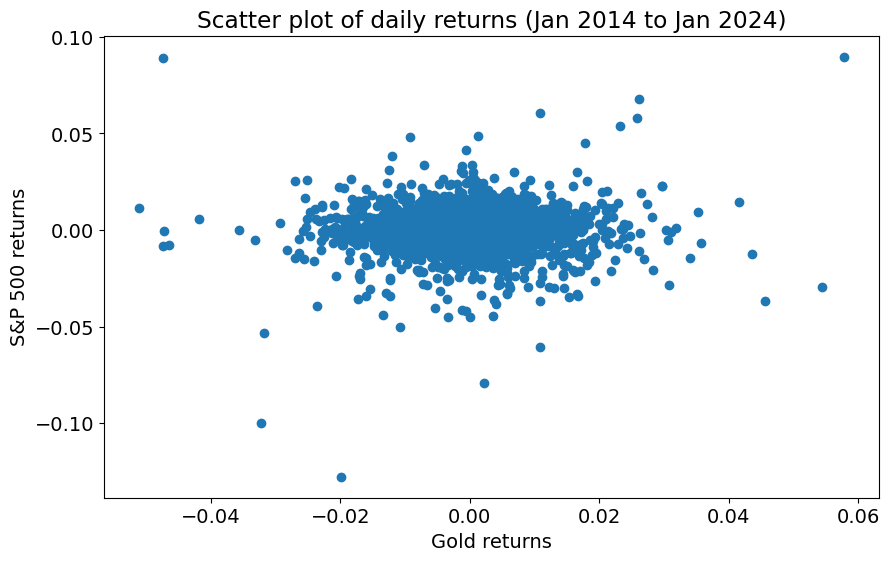

In [19]:
plt.figure(figsize = (10, 6))
plt.rcParams.update({'font.size': 14})
plt.xlabel("Gold returns")
plt.ylabel("S&P 500 returns")
plt.title("Scatter plot of daily returns (Jan 2014 to Jan 2024)")
plt.scatter(dataFrame['GC'], dataFrame['SPX'])
plt.show()

In [20]:
####################################################
## 1. Calculate correlation between Xs and Y

# df.corr()

In [21]:
# .2222222222222

dataFrame.corr()

,GC,CL,SPX,RB,NG
GC,1.000000,0.097851,0.010732,0.065453,0.001231
CL,0.097851,1.000000,0.253148,0.672705,0.106307
SPX,0.010732,0.253148,1.000000,0.327365,0.082027
RB,0.065453,0.672705,0.327365,1.000000,0.102370
NG,0.001231,0.106307,0.082027,0.102370,1.000000


In [22]:
# .............1


####################################################
# ## 2a. Fit a simple linear regression model to the data using statsmodels 

# ### Create an instance of the class OLS
# slr_sm_model = smf.ols('ko ~ spy', data=df)

# ### Fit the model (statsmodels calculates beta_0 and beta_1 here)
# slr_sm_model_ko = slr_sm_model.fit()

# ### Summarize the model

# print(slr_sm_model_ko.summary()) 

# param_slr = slr_sm_model_ko.params

####################################################

In [23]:
# ..22222222222222222222

####################################################
## 2a. Fit a simple linear regression model to the data using statsmodels 

### Create an instance of the class 
slr_sm_model = smf.ols('GC ~ CL', data=dataFrame)

### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_gold = slr_sm_model.fit()

### Summarize the model

print(slr_sm_model_gold.summary()) 

param_slr = slr_sm_model_gold.params


                            OLS Regression Results                            
Dep. Variable:                     GC   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     24.24
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           9.07e-07
Time:                        13:44:19   Log-Likelihood:                 8222.8
No. Observations:                2509   AIC:                        -1.644e+04
Df Residuals:                    2507   BIC:                        -1.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      1.030      0.3

In [24]:
####################################################
## 2a. Fit a simple linear regression model to the data using statsmodels 

### Create an instance of the class 
slr_sm_model = smf.ols('GC ~ SPX', data=dataFrame)

### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_gold = slr_sm_model.fit()

### Summarize the model

print(slr_sm_model_gold.summary()) 

param_slr = slr_sm_model_gold.params


                            OLS Regression Results                            
Dep. Variable:                     GC   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2888
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.591
Time:                        13:44:19   Log-Likelihood:                 8210.8
No. Observations:                2509   AIC:                        -1.642e+04
Df Residuals:                    2507   BIC:                        -1.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      1.031      0.3

In [25]:
# dataFrame["^SPX"]

KeyError: '^SPX'

In [ ]:
####################################################
# ### Print the parameter estimates of the simple linear regression model

# print("\n")
# print("====================================================================")
# print("The intercept in the statsmodels regression model is", \
#       np.round(param_slr.Intercept, 4))
# print("The slope in the statsmodels regression model is", \
#       np.round(param_slr.spy, 4))
# print("====================================================================")
# print("\n")

In [ ]:
# .....22222222222222

####################################################
### Print the parameter estimates of the simple linear regression model

print("\n")
print("====================================================================")
print("The intercept in the statsmodels regression model is", \
      np.round(param_slr.Intercept, 4))
print("The slope in the statsmodels regression model is", \
      np.round(param_slr.CL, 4))
print("====================================================================")
print("\n")

In [ ]:
print("\n")
print("====================================================================")
print("The intercept in the statsmodels regression model is", \
      np.round(param_slr.Intercept, 4))
print("The slope in the statsmodels regression model is", \
      np.round(param_slr.SPX, 4))
print("====================================================================")
print("\n")

In [ ]:
# ####################################################
# ## Linear regression plot of X (spy) and Y (ko)
# plt.figure(figsize = (10, 6))
# plt.rcParams.update({'font.size': 14})
# plt.xlabel("SPY returns")
# plt.ylabel("KO returns")
# plt.title("Simple linear regression model")
# plt.scatter(df['spy'],df['ko'])
# plt.plot(df['spy'], param_slr.Intercept+param_slr.spy * df['spy'],
#          label='Y={:.4f}+{:.4f}X'.format(param_slr.Intercept, param_slr.spy), 
#          color='red')
# plt.legend()
# plt.show()

In [ ]:
# ..........2222222222222
####################################################
## Linear regression plot of X (spy) and Y (ko)
plt.figure(figsize = (10, 6))
plt.rcParams.update({'font.size': 14})
plt.xlabel(" S&P 500 returns")
plt.ylabel("Gold returns")
plt.title("Simple linear regression model")
plt.scatter(dataFrame['SPX'],dataFrame['GC'])
plt.plot(dataFrame['SPX'], param_slr.Intercept+param_slr.SPX * dataFrame['SPX'],
         label='Y={:.4f}+{:.4f}X'.format(param_slr.Intercept, param_slr.SPX), 
         color='red')
plt.legend()
plt.show()

In [ ]:
####################################################
# ### Fit a multiple linear regression model to the data using statsmodels    

# ### Create an instance of the class OLS
# mlr_sm_model = smf.ols('ko ~ spy + pep + usdx', data=df)

# ### Fit the model (statsmodels calculates beta_0, beta_1, beta_2, beta_3 here)
# mlr_sm_model_ko = mlr_sm_model.fit()

# ### Summarize the model

# print(mlr_sm_model_ko.summary())

In [ ]:
# .222222222222222222222


####################################################
### Fit a multiple linear regression model to the data using statsmodels    

### Create an instance of the class OLS
mlr_sm_model = smf.ols('GC ~ CL + RB + NG ', data=dataFrame)

### Fit the model (statsmodels calculates beta_0, beta_1, beta_2, beta_3 here)
mlr_sm_model_gold = mlr_sm_model.fit()

### Summarize the model

print(mlr_sm_model_gold.summary())

In [ ]:
# .222222222222222222222


####################################################
### Fit a multiple linear regression model to the data using statsmodels    

### Create an instance of the class OLS
mlr_sm_model = smf.ols('GC ~ CL + RB + NG ', data=dataFrame)

### Fit the model (statsmodels calculates beta_0, beta_1, beta_2, beta_3 here)
mlr_sm_model_gold = mlr_sm_model.fit()

### Summarize the model

print(mlr_sm_model_gold.summary())

In [ ]:
####################################################
### Print the parameter estimates of the muliple linear regression model

# param_mlr = mlr_sm_model_ko.params

# print("\n")
# print("====================================================================")
# print("The intercept and slopes in the statsmodels regression model are")
# print("\n")
# print(param_mlr)
# print("====================================================================")
# print("\n")
####################################################

In [ ]:
# .......222222222222222
####################################################
### Print the parameter estimates of the muliple linear regression model

param_mlr = mlr_sm_model_gold.params

print("\n")
print("====================================================================")
print("The intercept and slopes in the statsmodels regression model are")
print("\n")
print(param_mlr)
print("====================================================================")
print("\n")
####################################################